# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/fashion_mnist_prevent_overfitting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

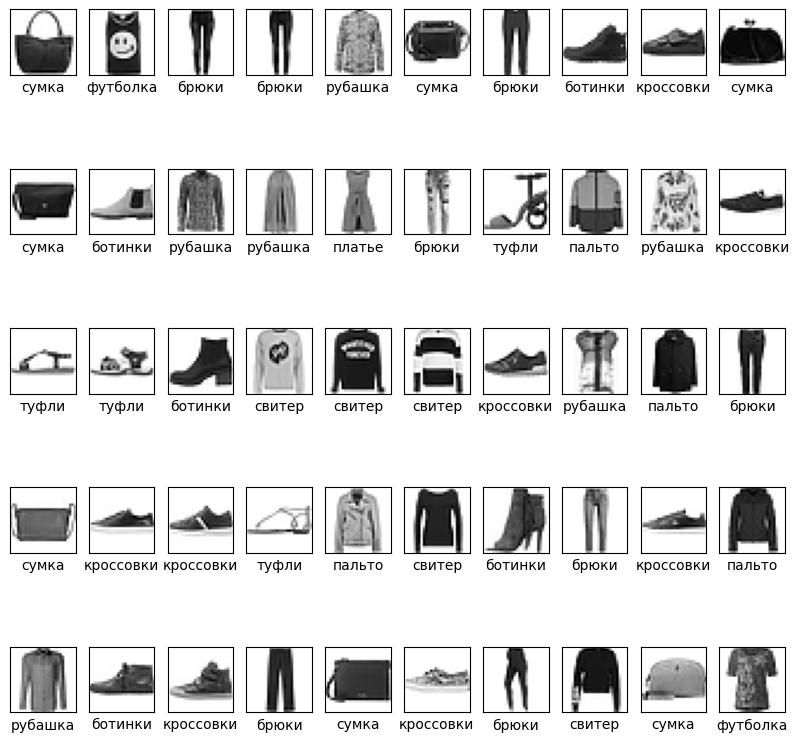

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Работа с правильными ответами**

In [7]:
n = 0

In [8]:
y_train[n]

np.uint8(9)

**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Создаем нейронную сеть

**Создаем последовательную модель**

In [12]:
# Создаем последовательную модель
model = Sequential(
    [   
        # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
        Dense(800, input_dim=784, activation="relu"),
        # Выходной полносвязный слой, 10 нейронов (по количеству классов)
        Dense(10, activation="softmax")
    ]
)

c:\Users\sozyk\projects\dlpython_course\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Компилируем сеть**

In [13]:
model.compile(loss="categorical_crossentropy", # Функция потерь
              optimizer="SGD",                 # Оптимизатор
              metrics=["accuracy"])    


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

## Обучаем нейронную сеть

In [15]:
history = model.fit(x_train,              # Данные для обучения
                    y_train,              # Правильные ответы
                    batch_size=200,       # Размер мини-выборки
                    epochs=100,           # Количество эпох обучения
                    validation_split=0.2, # Доля для проверочного набора данных
                    verbose=1)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6613 - loss: 1.2042 - val_accuracy: 0.7416 - val_loss: 0.8450
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7624 - loss: 0.7701 - val_accuracy: 0.7793 - val_loss: 0.7013
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7908 - loss: 0.6704 - val_accuracy: 0.7998 - val_loss: 0.6323
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.6166 - val_accuracy: 0.8085 - val_loss: 0.5943
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.5808 - val_accuracy: 0.8151 - val_loss: 0.5655
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.5554 - val_accuracy: 0.8202 - val_loss: 0.5444
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8247 - loss: 0.5360 - val_accuracy: 0.8230 - val_loss: 0.5297
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8294 - loss: 0.5203 - val_accu

### Визуализация прогресса обучения

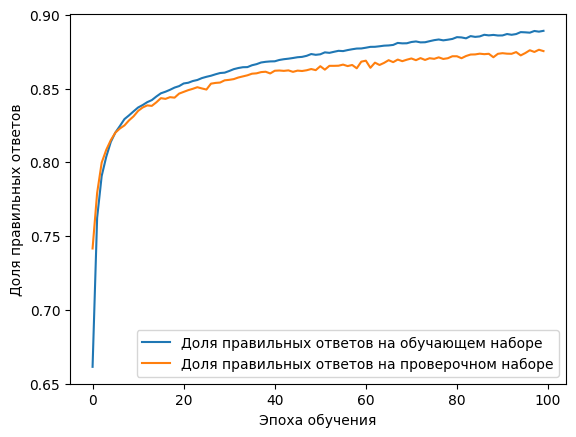

In [16]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

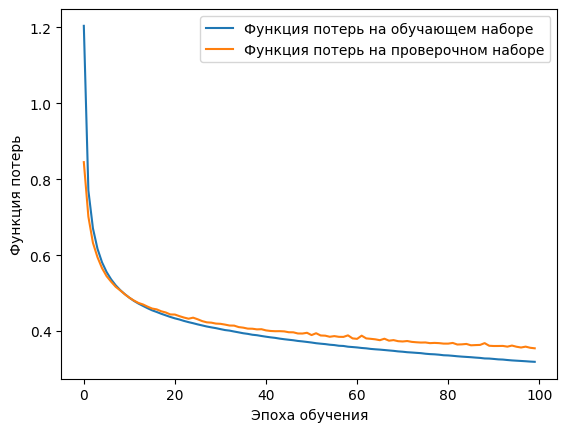

In [17]:
plt.plot(history.history['loss'], 
         label='Функция потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Функция потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8663 - loss: 0.3773


In [19]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 86.63


## Сохраняем обученную нейронную сеть

In [20]:
model.save('fmnist_desne.keras')

## Используем сеть для распознавания предметов одежды

In [21]:
n_rec = 495

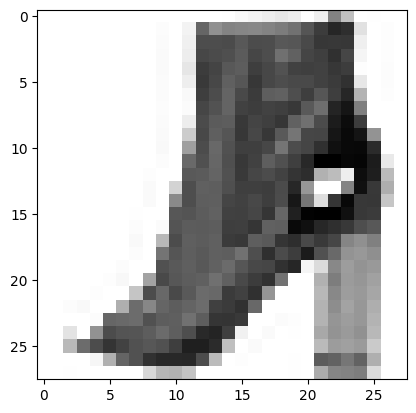

In [22]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [23]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [24]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


**Печатаем результаты распознавания**

In [25]:
prediction

array([[1.7820959e-05, 6.3124605e-07, 1.3826815e-06, 7.5030039e-07,
        3.4754240e-08, 2.7111169e-02, 9.9263361e-06, 3.4586084e-04,
        8.3640898e-06, 9.7250408e-01]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [26]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки


**Печатаем правильный ответ**

In [27]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 9
Название класса: ботинки


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 50, 100, 200, 300.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
5. Используйте разные [оптимизаторы](https://keras.io/api/optimizers/): adam, rmsprop и другие.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.